In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv("C:/Users/abu_s/Desktop/Data/json/Automobile Data/Automobile_data.csv", encoding='latin1')

In [7]:
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


In [9]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

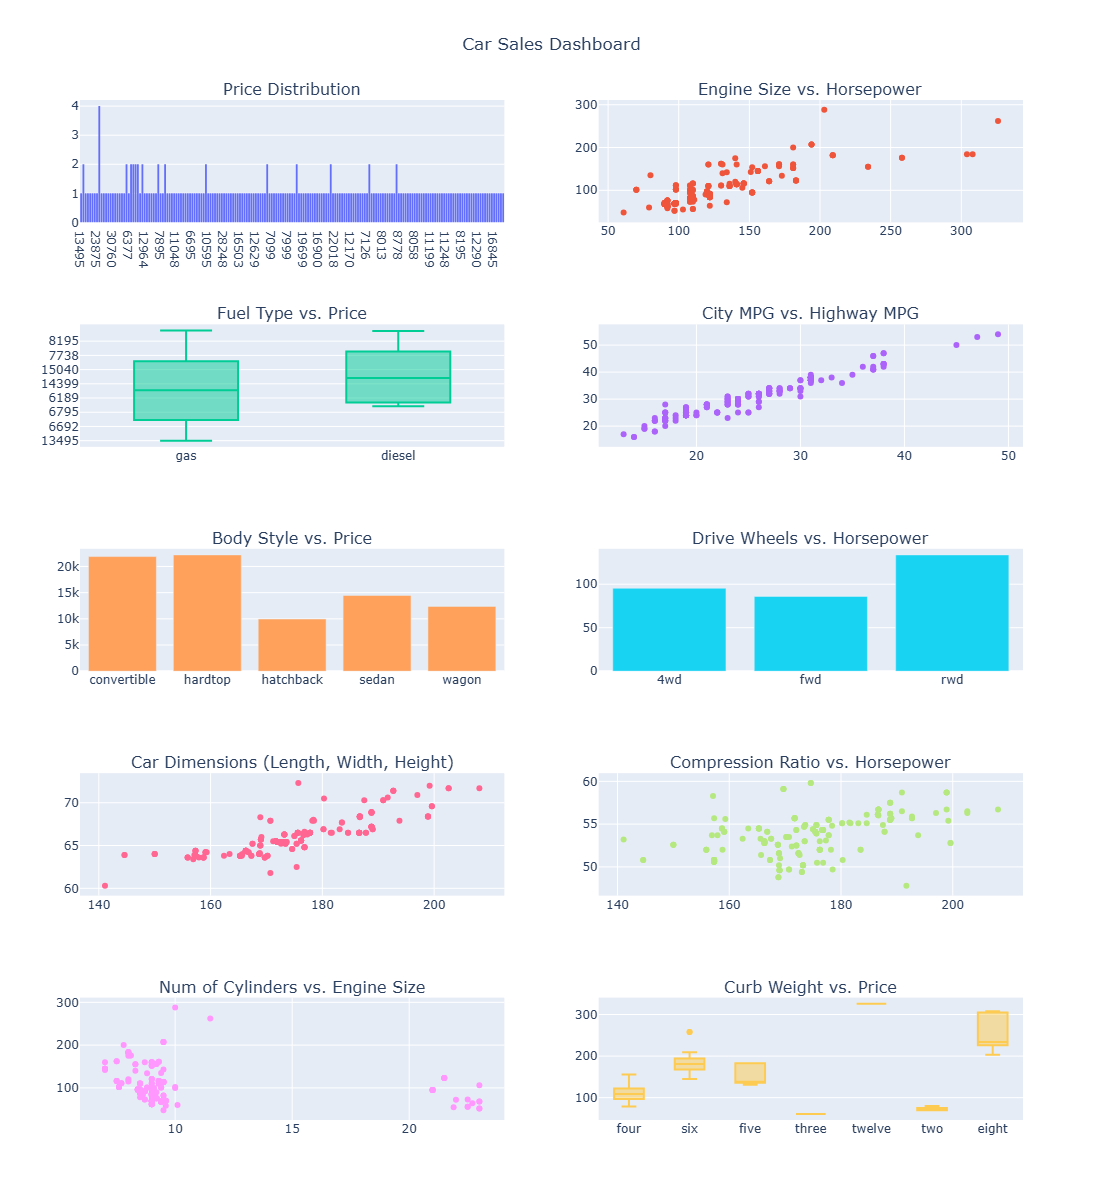

In [71]:
# Create the subplots
fig = make_subplots(
    rows=5, cols=2,  # Adjust rows and columns as necessary
    subplot_titles=("Price Distribution", "Engine Size vs. Horsepower", "Fuel Type vs. Price",
                    "City MPG vs. Highway MPG", "Body Style vs. Price", "Drive Wheels vs. Horsepower",
                    "Car Dimensions (Length, Width, Height)", "Compression Ratio vs. Horsepower",
                    "Num of Cylinders vs. Engine Size", "Curb Weight vs. Price"),
    row_heights=[0.2, 0.2, 0.2, 0.2, 0.2],
    vertical_spacing=0.1, horizontal_spacing=0.1,
    specs=[[{"type": "histogram"}, {"type": "scatter"}], 
           [{"type": "box"}, {"type": "scatter"}], 
           [{"type": "bar"}, {"type": "scatter"}], 
           [{"type": "scatter"}, {"type": "scatter"}],
           [{"type": "scatter"}, {"type": "scatter"}]]
)


# Price Distribution (Histogram)
fig.add_trace(
    go.Histogram(x=df['price'], name="Price Distribution"),
    row=1, col=1
)

# Engine Size vs. Horsepower (Scatter Plot)
fig.add_trace(
    go.Scatter(x=df['engine-size'], y=df['horsepower'], mode='markers', name="Engine Size vs. Horsepower"),
    row=1, col=2
)

# Fuel Type vs. Price (Box Plot)
fig.add_trace(
    go.Box(x=df['fuel-type'], y=df['price'], name="Fuel Type vs. Price"),
    row=2, col=1
)

# City MPG vs. Highway MPG (Scatter Plot)
fig.add_trace(
    go.Scatter(x=df['city-mpg'], y=df['highway-mpg'], mode='markers', name="City MPG vs. Highway MPG"),
    row=2, col=2
)

# Convert 'price' to numeric, coercing errors (non-numeric values will be set to NaN)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Group by 'body-style' and calculate the mean 'price' for each group
agg_body_style_price = df.groupby('body-style')['price'].mean().reset_index()

# Create a bar chart with 'body-style' on the x-axis and mean 'price' on the y-axis
fig.add_trace(
    go.Bar(x=agg_body_style_price['body-style'], y=agg_body_style_price['price'], name="Body Style vs. Price"),
    row=3, col=1
)

# Drive Wheels vs. Horsepower (Bar Chart)
# Convert 'horsepower' to numeric, setting errors='coerce' to replace invalid values with NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Group the data by 'drive-wheels' and calculate the mean horsepower (ignoring NaN values)
agg_drive_wheels = df.groupby('drive-wheels')['horsepower'].mean().reset_index()

# Create a bar chart with 'drive-wheels' on the x-axis and mean 'horsepower' on the y-axis
fig.add_trace(
    go.Bar(x=agg_drive_wheels['drive-wheels'], y=agg_drive_wheels['horsepower'], name="Drive Wheels vs. Horsepower"),
    row=3, col=2
)



# Car Dimensions (Length, Width, Height) Comparison (Scatter Matrix)
fig.add_trace(
    go.Scatter(x=df['length'], y=df['width'], mode='markers', name="Length vs. Width"),
    row=4, col=1
)
fig.add_trace(
    go.Scatter(x=df['length'], y=df['height'], mode='markers', name="Length vs. Height"),
    row=4, col=2
)

# Compression Ratio vs. Horsepower (Scatter Plot)
fig.add_trace(
    go.Scatter(x=df['compression-ratio'], y=df['horsepower'], mode='markers', name="Compression Ratio vs. Horsepower"),
    row=5, col=1
)

# Num of Cylinders vs. Engine Size (Box Plot)
fig.add_trace(
    go.Box(x=df['num-of-cylinders'], y=df['engine-size'], name="Num of Cylinders vs. Engine Size"),
    row=5, col=2
)

# Update layout and add title
fig.update_layout(
    title_text="Car Sales Dashboard",  # Overall dashboard title
    title_x=0.5,  # Center the title
    height=1200,  # Adjust height for better spacing
    width=1000,  # Adjust width for better spacing
    showlegend=False
)

# Show the plot
fig.show()